# Coding Discussion #5
Madeline Kinnaird

In [4]:
import math

#data manipulation
import pandas as pd
import numpy as np

## cleaning data
import missingno as msno

## visualizations 
import matplotlib.pyplot as plt
import seaborn as sns

## modeling
from sklearn.model_selection import train_test_split
from sklearn import datasets

## silence warnings 
import warnings
warnings.filterwarnings("ignore")

In [5]:
## import data
df = pd.read_csv("../turnout.csv")

## Explore & Clean Data

In [6]:
##check types
df.dtypes

id           int64
age          int64
educate    float64
income     float64
vote         int64
white        int64
dtype: object

In [7]:
## summary statistics to get a feel for the data
np.round(df.describe(), 2).T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
id,1000.50,577.49,1.0,2000.00
age,45.30,17.52,17.0,95.00
educate,12.07,3.37,0.0,19.00
income,3.89,2.83,0.0,14.92
vote,0.75,0.44,0.0,1.00
white,0.85,0.35,0.0,1.00


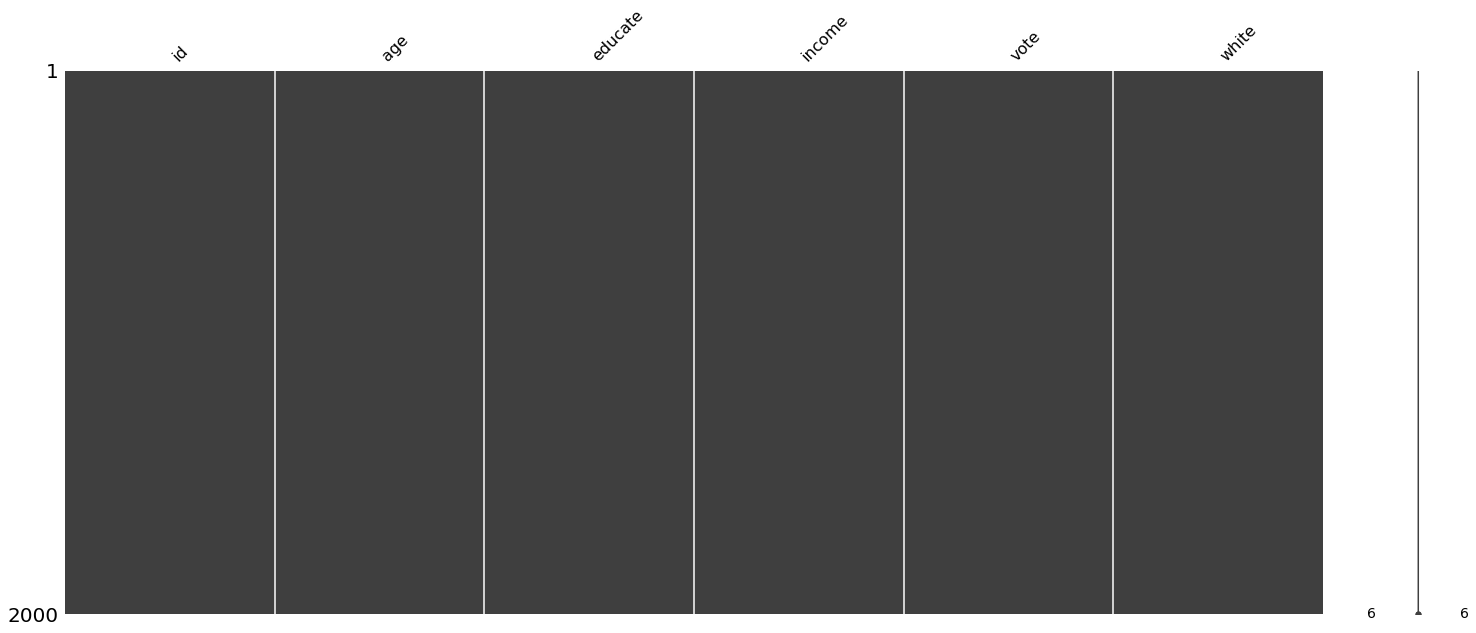

In [8]:
## check for blanks
msno.matrix(df)

In [9]:
def plot_distribution(dataset, target, cols=3, width=20, height=10, hspace=0.2, wspace=0.5):
    '''
    Function returns graph distribution based on target column of a dataset 
    
    Input: dataset (dataframe), target (name of column)
    Output: Visualizations
    
    '''
    dataset[target] = dataset[target]
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        sns.distplot(dataset.loc[dataset[target] == 0][column].dropna(), kde_kws={"label": "Did Not Vote"});
        sns.distplot(dataset.loc[dataset[target] == 1][column].dropna(), kde_kws={"label": "Voted"});

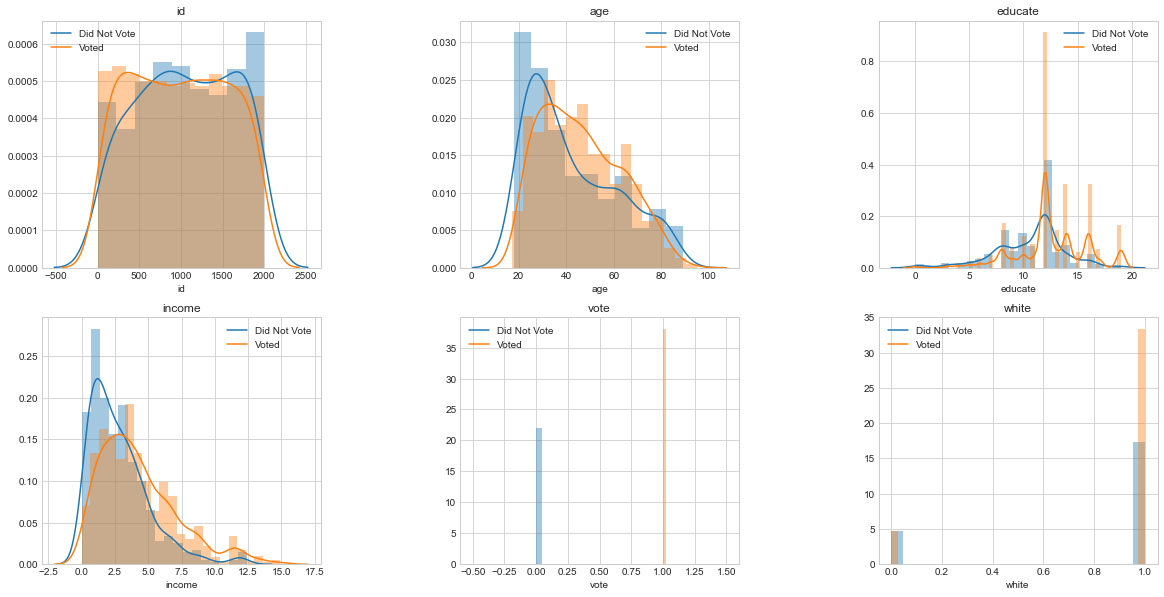

In [10]:
## plot variables for distributions for target

plot_distribution(df, 'vote')

##### Observations from graphs:

## Classification

<h3><center>Bayes Rule</center></h3>
$$Pr(class | data) = \frac{Pr(data | class) Pr(class)}{Pr(data)}$$

<br><br>


<h3><center>We will assume that all the features are mutually independent</center></h3>
$$Pr(y | X) = \frac{Pr( x_1| y)\times Pr( x_2| y) \times \dots \times  Pr(y)}{Pr(X)}$$

<br><br>

<h3><center>Select class with highest probability</center></h3>
$$y = argmax_yPr(y | X) = argmax_y\frac{Pr( x_1| y)\times Pr( x_2| y) \times \dots \times  Pr(y)}{Pr(X)}$$

$$y = argmax_yPr(x_1 | y)\times Pr(x_2 | y)\dots Pr( x_n| y)\times  Pr(y)$$

$$y = argmax_ylog(Pr(x_1 | y)) + log(Pr(x_2 | y)) + \dots + log(Pr( x_n| y)) + Pr(y)$$

<h3><center>Prior (Frequency) </center></h3>
$$Pr(y)$$

<h3><center>Class Conditional Probability </center></h3>
$$Pr(x_i | y)$$

$$Pr(x_i | y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \times exp(-\frac{(x_i - \mu_y )^2}{2\sigma^2_y})$$


In [11]:
class NaiveBayes:
    
    def fit(self, X, y):
        ## based on data get numbers for samples, features, and classes
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        ## init mean, variance and prior with dimension based on # of classes and features
        self.mean = np.zeros((n_classes, n_features), dtype = np.float64)
        self.var = np.zeros((n_classes, n_features), dtype = np.float64)
        self.priors = np.zeros(n_classes, dtype = np.float64)
        
        ## calculate mean, variance, and priors
        for c in self.classes:
            X_class = X[c == y]
            self.mean[c,:] = X_class.mean(axis=0)
            self.var[c,:] = X_class.var(axis=0)
            self.priors[c] = X_class.shape[0] / float(n_samples) #frequency of how often class occurs
            
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return y_pred
    
    def _predict(self, x):
        ## posteriors
        posteriors = []
        
        for index, c in enumerate(self.classes):
            prior = np.log(self.priors[index])
            class_conditional = np.sum(np.log(self.pdf(index, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
            
        ## return index with highest probability  
        return self.classes[np.argmax(posteriors)]
            
    def pdf(self, class_index, x):
        mean = self.mean[class_index]
        var = self.var[class_index]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2* np.pi * var)
        return numerator / denominator

In [12]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy 



In [13]:
y = df['vote']
X = df.drop(columns=['vote'])

X = X.reset_index().values


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [26]:
nb = NaiveBayes()
nb.fit(X_train, y_train)

predictions = nb.predict(X_test)

print("NB Accuracy:", accuracy(y_test, predictions))

NB Accuracy: 0.7075


# ROC Curve

In [20]:
from sklearn.naive_bayes import GaussianNB # Classifier 
import sklearn.metrics as m # Metrics to determine the classification 

In [22]:
m.roc_auc_score(y_test,predictions)

0.5416666666666666



<h3><center>Posterior Probability</center></h3>
$$Pr(class | data)$$

<br><br>

<h3><center>Likelihood</center></h3>
$$Pr(data | class))$$

<br><br>

<h3><center>Class Prior Probability</center></h3>
$$Pr(class)$$

<br><br>

<h3><center>Predictor Prior Probability</center></h3>
$$Pr(data)$$

